In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
df = pd.read_csv('csv/new_dataset.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df['job_posted_month_number'] = df['job_posted_date'].dt.month
df = df.drop(columns=df.columns[0])
df.set_index('job_id')

,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month,name,skills,type,job_posted_month_number
job_id,,,,,,,,,,,,,,,,,,,,
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,sql,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,python,programming,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,excel,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,tableau,analyst_tools,9
0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep,Cryptology,power bi,analyst_tools,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,spark,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,hadoop,libraries,3
1452207,154,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Mar,Capital One,kafka,libraries,3


In [2]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_canada = df[(df['job_country']=='Canada') & (df['job_title_short']=='Data Analyst')]
# df_us
# df_canada

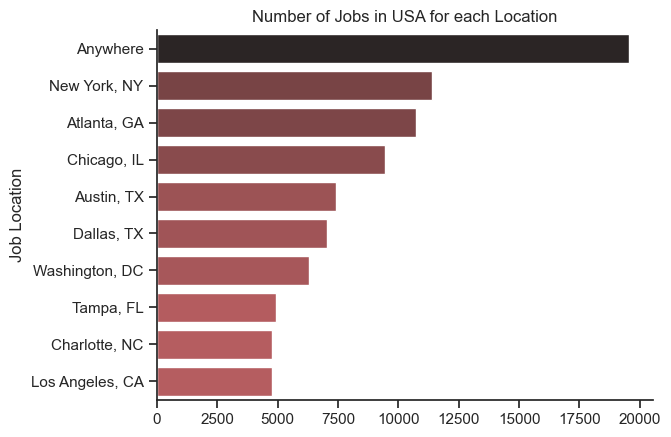

In [3]:
df_plot_location = df_us['job_location'].value_counts().head(10).to_frame()
sbn.set_theme(style='ticks')
sbn.barplot(data=df_plot_location, x='count', y='job_location', hue='count' ,palette='dark:r_r', legend=False)
plt.ylabel('Job Location')
plt.xlabel('')
plt.title('Number of Jobs in USA for each Location')
sbn.despine()

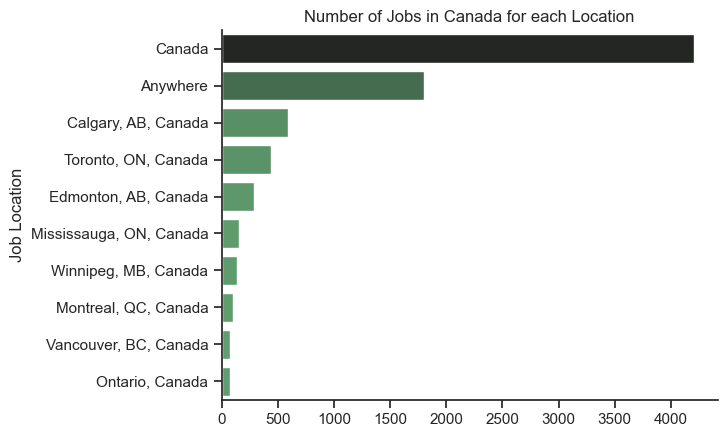

In [4]:
df_plot_local = df_canada['job_location'].value_counts().head(10).to_frame()
# sbn.set_theme(style='ticks')
sbn.barplot(data=df_plot_local, x='count', y='job_location', hue='count' ,palette='dark:g_r', legend=False)
plt.ylabel('Job Location')
plt.xlabel('')
plt.title('Number of Jobs in Canada for each Location')
sbn.despine()

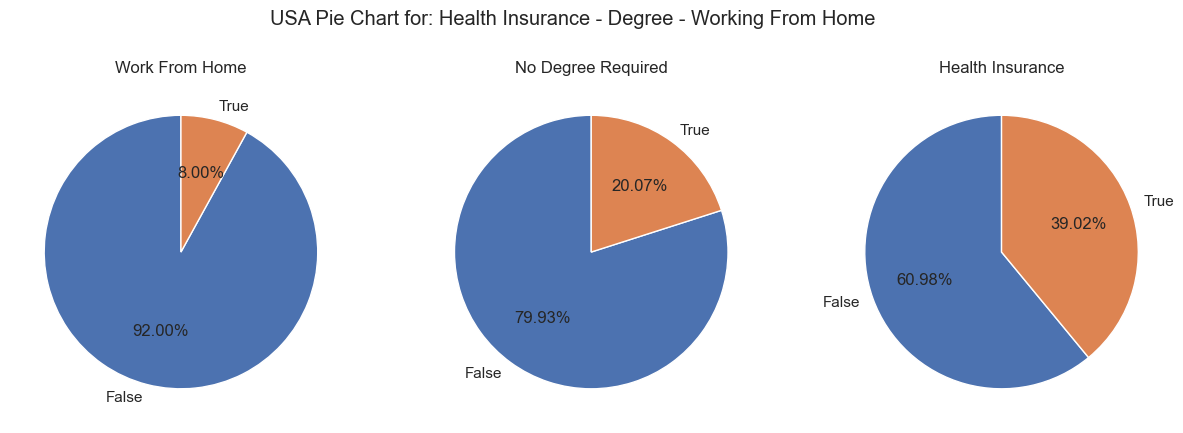

In [5]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
dict_items = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'No Degree Required',
    'job_health_insurance': 'Health Insurance'
}

for i, (desc, title) in enumerate(dict_items.items()):
    # print(f'{i}-->i,  {desc}: Desc, {title}: title')
    ax[i].pie(df_us[desc].value_counts(), startangle=90, autopct='%1.2f%%', labels=["False", 'True'])
    ax[i].set_title(title)
plt.suptitle('USA Pie Chart for: Health Insurance - Degree - Working From Home')
plt.show()

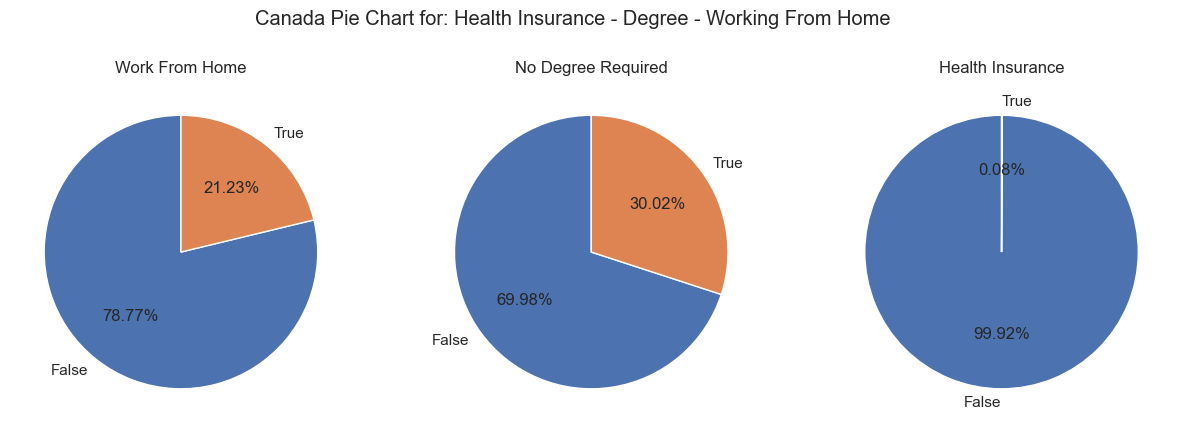

In [6]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
dict_items = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'No Degree Required',
    'job_health_insurance': 'Health Insurance'
}

for i, (desc, title) in enumerate(dict_items.items()):
    # print(f'{i}-->i,  {desc}: Desc, {title}: title')
    ax[i].pie(df_canada[desc].value_counts(), startangle=90, autopct='%1.2f%%', labels=["False", 'True'])
    ax[i].set_title(title)
plt.suptitle('Canada Pie Chart for: Health Insurance - Degree - Working From Home')
plt.show()

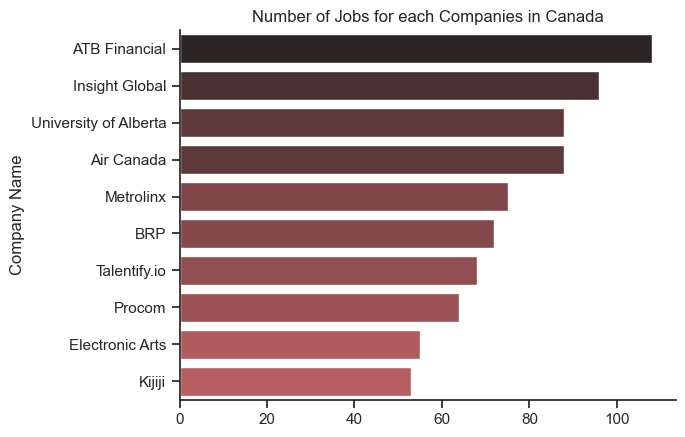

In [7]:
df_plot_company = df_canada['name'].value_counts().head(10).to_frame()
# sbn.set_theme(style='ticks')
sbn.barplot(data=df_plot_company, x='count', y='name', hue='count' ,palette='dark:r_r', legend=False)
plt.ylabel('Company Name')
plt.xlabel('')
plt.title('Number of Jobs for each Companies in Canada')
sbn.despine()

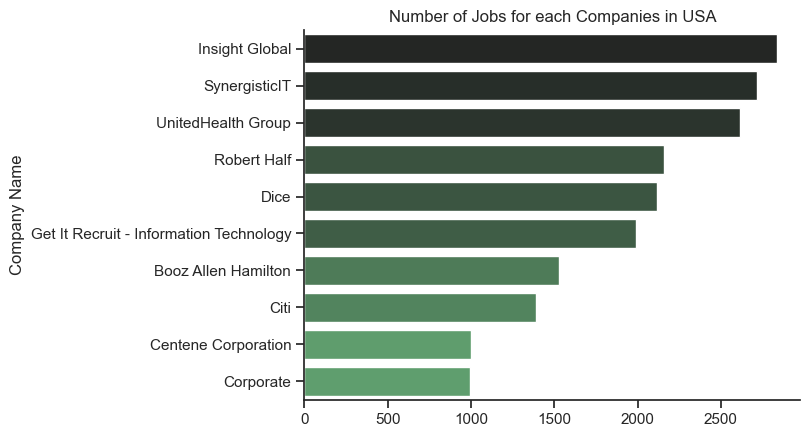

In [8]:
df_plot_company_us = df_us['name'].value_counts().head(10).to_frame()
sbn.set_theme(style='ticks')
sbn.barplot(data=df_plot_company_us, x='count', y='name', hue='count' ,palette='dark:g_r', legend=False)
plt.ylabel('Company Name')
plt.xlabel('')
plt.title('Number of Jobs for each Companies in USA')
sbn.despine()